<a href="https://colab.research.google.com/github/EricRibeiroAlves/DeteccaoFakeNews/blob/main/Modelos/%5BAP_T%5D_TI_Modelo_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Valores ausentes antes do tratamento:
title    0
text     0
label    0
dtype: int64
Valores ausentes após o tratamento:
title    0
text     0
label    0
dtype: int64
Métricas do modelo Decision Tree:
Acurácia: 0.9952
F1-Score: 0.9952
ROC-AUC: 0.9957
              precision    recall  f1-score   support

        fake       1.00      0.99      1.00      7091
        real       0.99      1.00      0.99      6379

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



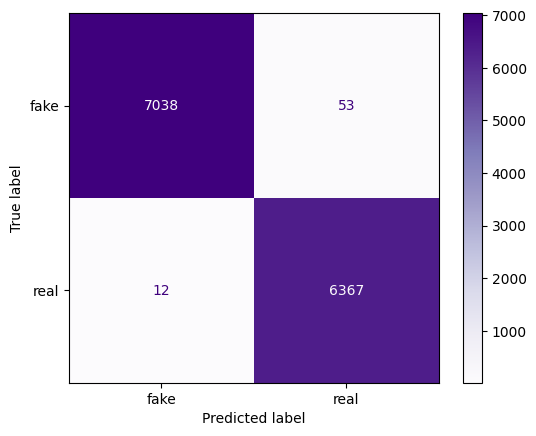

In [ ]:
# Importação de Libs
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from google.colab import drive

# Importação do Dataset ISOT Fake News Dataset

# Carregar os dados
drive.mount('/content/drive')
dat_fake = "/content/drive/MyDrive/Eng. Controle e Automação/8º Semestre/AP/dataset_FakeNews/Fake.csv"
dat_real = "/content/drive/MyDrive/Eng. Controle e Automação/8º Semestre/AP/dataset_FakeNews/True.csv"
dt_fake = pd.read_csv(dat_fake)
dt_real = pd.read_csv(dat_real)

dt_fake['label'] = 'fake'
dt_real['label'] = 'real'

dt = pd.concat([dt_fake, dt_real], ignore_index=True)

# Filtro p/ Variáveis de Interesse
df = dt[['title', 'text', 'label']]

# Tratamento e Criação

# **2 - Verificação de valores nulos**
print("Valores ausentes antes do tratamento:")
print(df.isnull().sum())

# Remover linhas com valores nulos
df = df.dropna()

print("Valores ausentes após o tratamento:")
print(df.isnull().sum())

# Codificar os rótulos
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Divisão dos dados
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.3, random_state=42)

# Vetorização com TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=2500, stop_words='english')
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Criação e treinamento do modelo Decision Tree
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree.fit(x_train_tfidf, y_train)

# Previsão e Resultados

# Previsões nos dados de teste
y_pred = decision_tree.predict(x_test_tfidf)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, decision_tree.predict_proba(x_test_tfidf)[:, 1])

print("Métricas do modelo Decision Tree:")
print(f"Acurácia: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Relatório de classificação detalhado
target_names = [str(cls) for cls in label_encoder.classes_]
print(classification_report(y_test, y_pred, target_names=target_names))

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_estimator(decision_tree, x_test_tfidf, y_test, display_labels=label_encoder.classes_, cmap='Purples')
plt.show()

# **4 - Função para classificar uma notícia com validação**
def classificar_noticia(texto_noticia):
    # Validar entrada
    if not texto_noticia.strip():
        return "Texto inválido. Por favor, insira um texto para classificar."

    # Transformar a notícia em TF-IDF
    texto_tfidf = tfidf_vectorizer.transform([texto_noticia])

    # Fazer a previsão com o modelo treinado
    previsao = decision_tree.predict(texto_tfidf)

    # Decodificar o rótulo (0 = real, 1 = fake)
    resultado = label_encoder.inverse_transform(previsao)

    # Retornar o resultado
    if resultado[0] == 'fake':
        return "A notícia é FAKE!"
    else:
        return "A notícia é REAL!"




In [ ]:
# Exemplo de uso:
texto_entrada = input("Digite o texto da notícia para classificar: ")

# Classificar a notícia
resultado = classificar_noticia(texto_entrada)

# Mostrar o resultado
print(resultado)

Digite o texto da notícia para classificar: Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? On